Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import pickle
import matplotlib.pyplot as plt

Start Time


In [ ]:
# Start total execution time
start_time = time.time()



Data Collection and Analysis



In [ ]:
# Load the diabetes dataset into a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Data analysis
print(diabetes_dataset.head())
print(diabetes_dataset.describe())
print(diabetes_dataset['diabetes'].value_counts())

  gender   age  hypertension  heart_disease smoking_history    bmi  \
0      0  80.0             0              1           never  25.19   
1      0  54.0             0              0         No Info  27.32   
2      1  28.0             0              0           never  27.32   
3      0  36.0             0              0         current  23.45   
4      1  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.08000

In [ ]:
# Drop the gender column
diabetes_dataset.drop(columns='gender', inplace=True)

In [ ]:
# Map smoking history to integers
diabetes_dataset['smoking_history'] = diabetes_dataset['smoking_history'].map({
    'never': 0,
    'No Info': 1,
    'former': 2,
    'current': 3
})

In [ ]:
# Check for NaN values and drop rows with any NaN values
diabetes_dataset.dropna(inplace=True)

In [ ]:
# Separate data and labels
X = diabetes_dataset.drop(columns='diabetes', axis=1)
Y = diabetes_dataset['diabetes']

Train Test Split

In [ ]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
# Define the KNN classifier with a specified number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

Training the Model

In [ ]:
# Train the KNN model
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Model Evaluation and Accuracy Score

In [ ]:
# Model evaluation for KNN
X_train_prediction = knn_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = knn_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Print the accuracy scores
print(f'Accuracy score of the training data: {training_data_accuracy * 100:.2f}%')
print(f'Accuracy score of the test data: {test_data_accuracy * 100:.2f}%')

Accuracy score of the training data: 96.43%
Accuracy score of the test data: 95.54%


End Time

In [ ]:
# End total execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time:.4f} seconds")

Total execution time: 8.6542 seconds


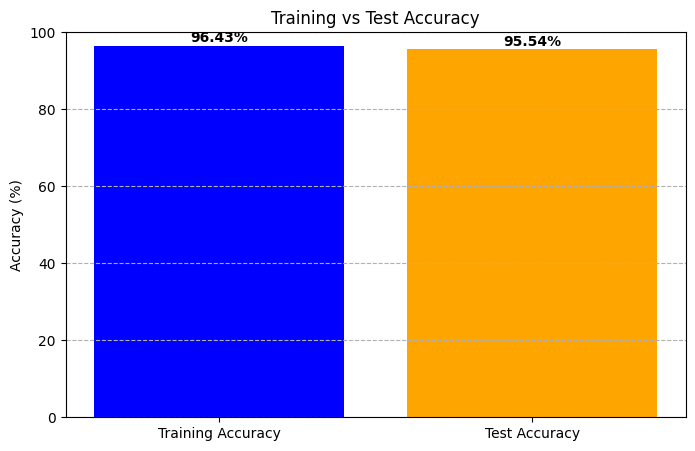

In [ ]:
# Plotting accuracies (optional)
accuracies = [training_data_accuracy * 100, test_data_accuracy * 100]
labels = ['Training Accuracy', 'Test Accuracy']

# Uncomment if you want to visualize the accuracies
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy')
plt.grid(axis='y', linestyle='--')

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

Making a Predictive System

In [ ]:
# Making a predictive system with KNN
input_data = (80, 0, 1, 0, 25.19, 6.6, 140)  # Example input
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Prediction with KNN
prediction = knn_classifier.predict(input_data_as_numpy_array)

if prediction[0] == 0:
    result = 'The person is not diabetic'
else:
    result = 'The person is diabetic'

print(result)

The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


For Saving the Model

In [ ]:
# Save the trained KNN model
filename = 'knn_diabetes_model.sav'
pickle.dump(knn_classifier, open(filename, 'wb'))

# End total execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time:.4f} seconds")

# Print feature names
for column in X.columns:
    print(column)

Total execution time: 8.9976 seconds
age
hypertension
heart_disease
smoking_history
bmi
HbA1c_level
blood_glucose_level


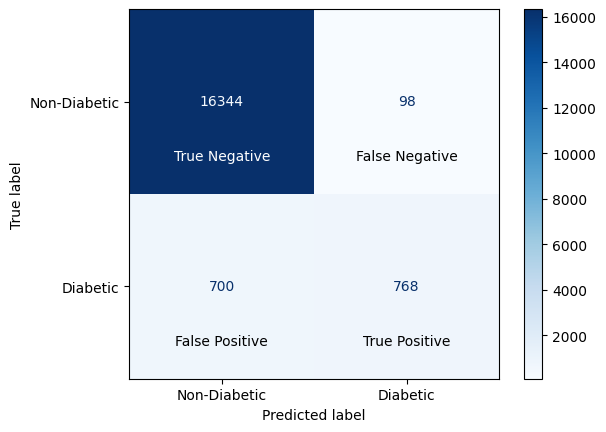

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix for the KNN model
cm = confusion_matrix(Y_test, X_test_prediction)

# Display the confusion matrix using sklearn's built-in display function
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])

# Plot with modifications
disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Classifier')

# Add labels for all components below the numbers
plt.text(0, 0.25, '\nTrue Negative', ha='center', va='center', color='white')
plt.text(1, 1.25, '\nTrue Positive', ha='center', va='center', color='black')
plt.text(0, 1.25, '\nFalse Positive', ha='center', va='center', color='black')
plt.text(1, 0.25, '\nFalse Negative', ha='center', va='center', color='black')

plt.show()
